## Pipeline with Titanic Data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [3]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
train_df_len = len(train_df)
train_df = pd.concat([train_df, test_df], axis = 0).reset_index(drop= True)

In [6]:
train_df.shape

(1309, 12)

In [7]:
train_df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [8]:
train_df[train_df["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1.0,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


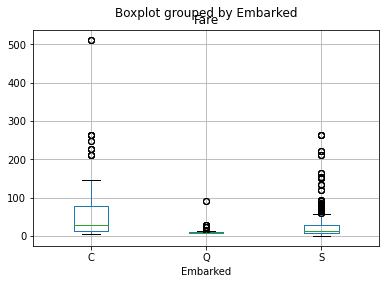

In [9]:
train_df.boxplot(column= "Fare", by= "Embarked")
plt.show()

In [10]:
train_df["Embarked"] = train_df["Embarked"].fillna("C")
train_df[train_df["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [11]:
train_df[train_df["Fare"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1043,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [12]:
train_df["Fare"] = train_df["Fare"].fillna(np.mean(train_df[train_df["Pclass"] == 3]["Fare"]))
train_df[train_df["Fare"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [13]:
train_df["Sex"] = [1 if i == "male" else 0 for i in train_df["Sex"]]
train_df["Sex"]

0       1
1       0
2       0
3       0
4       1
       ..
1304    1
1305    0
1306    1
1307    1
1308    1
Name: Sex, Length: 1309, dtype: int64

In [14]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


In [15]:
train_df[train_df["Age"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0.0,3,"Moran, Mr. James",1,NaN,0,0,330877,8.4583,NaN,Q
17,18,1.0,2,"Williams, Mr. Charles Eugene",1,NaN,0,0,244373,13.0000,NaN,S
19,20,1.0,3,"Masselmani, Mrs. Fatima",0,NaN,0,0,2649,7.2250,NaN,C
26,27,0.0,3,"Emir, Mr. Farred Chehab",1,NaN,0,0,2631,7.2250,NaN,C
28,29,1.0,3,"O'Dwyer, Miss. Ellen ""Nellie""",0,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
1299,1300,NaN,3,"Riordan, Miss. Johanna Hannah""""",0,NaN,0,0,334915,7.7208,NaN,Q
1301,1302,NaN,3,"Naughton, Miss. Hannah",0,NaN,0,0,365237,7.7500,NaN,Q
1304,1305,NaN,3,"Spector, Mr. Woolf",1,NaN,0,0,A.5. 3236,8.0500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",1,NaN,0,0,359309,8.0500,NaN,S


In [16]:
Age = train_df.Age
Age = Age.values.reshape(-1, 1)
Age.shape

(1309, 1)

In [17]:
from sklearn.impute import KNNImputer
imputer = KNNImputer()
imputer.fit(Age)
Age = imputer.transform(Age)

train_df["Age"] = pd.DataFrame(Age)

train_df["Age"].isnull().sum()

0

In [18]:
train_df.tail(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1299,1300,NaN,3,"Riordan, Miss. Johanna Hannah""""",0,29.881138,0,0,334915,7.7208,NaN,Q
1300,1301,NaN,3,"Peacock, Miss. Treasteall",0,3.000000,1,1,SOTON/O.Q. 3101315,13.7750,NaN,S
1301,1302,NaN,3,"Naughton, Miss. Hannah",0,29.881138,0,0,365237,7.7500,NaN,Q
1302,1303,NaN,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",0,37.000000,1,0,19928,90.0000,C78,Q
1303,1304,NaN,3,"Henriksson, Miss. Jenny Lovisa",0,28.000000,0,0,347086,7.7750,NaN,S
1304,1305,NaN,3,"Spector, Mr. Woolf",1,29.881138,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",0,39.000000,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",1,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",1,29.881138,0,0,359309,8.0500,NaN,S
1308,1309,NaN,3,"Peter, Master. Michael J",1,29.881138,1,1,2668,22.3583,NaN,C


In [19]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


In [20]:
train_df["Age"] = train_df["Age"].astype(int)

In [21]:
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1304,1305,NaN,3,"Spector, Mr. Woolf",1,29,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",0,39,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",1,38,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",1,29,0,0,359309,8.0500,NaN,S
1308,1309,NaN,3,"Peter, Master. Michael J",1,29,1,1,2668,22.3583,NaN,C


In [22]:
train_df.Name.tail(20)

1289                     Larsson-Rondberg, Mr. Edvard A
1290                           Conlon, Mr. Thomas Henry
1291                            Bonnell, Miss. Caroline
1292                                    Gale, Mr. Harry
1293                     Gibson, Miss. Dorothy Winifred
1294                             Carrau, Mr. Jose Pedro
1295                       Frauenthal, Mr. Isaac Gerald
1296       Nourney, Mr. Alfred (Baron von Drachstedt")"
1297                          Ware, Mr. William Jeffery
1298                         Widener, Mr. George Dunton
1299                    Riordan, Miss. Johanna Hannah""
1300                          Peacock, Miss. Treasteall
1301                             Naughton, Miss. Hannah
1302    Minahan, Mrs. William Edward (Lillian E Thorpe)
1303                     Henriksson, Miss. Jenny Lovisa
1304                                 Spector, Mr. Woolf
1305                       Oliva y Ocana, Dona. Fermina
1306                       Saether, Mr. Simon Si

In [23]:
name = train_df["Name"]
train_df["Title"] = [i.split(".")[0].split(",")[-1].strip() for i in name]

In [24]:
train_df["Title"].value_counts()

Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Major             2
Ms                2
Mlle              2
Dona              1
Jonkheer          1
Sir               1
the Countess      1
Mme               1
Capt              1
Lady              1
Don               1
Name: Title, dtype: int64

In [25]:
train_df["Title"] = train_df["Title"].replace(["Lady", "the Countess", "Capt", "Col", "Don", "Dr", "Major", "Rev", "Sir", "Jonkeer", "Dona"], "other")
train_df["Title"] = [0 if i == "Master" else 1 if i == "Miss" or i == "Ms" or i == "Mlle" or i == "Mrs" else 2 if i == "Mr" else 3 for i in train_df["Title"]]
train_df["Title"].head()

0    2
1    1
2    1
3    1
4    2
Name: Title, dtype: int64

In [26]:
train_df = pd.get_dummies(train_df, columns= ["Title"])
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_0,Title_1,Title_2,Title_3
0,1,0.0,3,"Braund, Mr. Owen Harris",1,22,1,0,A/5 21171,7.2500,NaN,S,0,0,1,0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38,1,0,PC 17599,71.2833,C85,C,0,1,0,0
2,3,1.0,3,"Heikkinen, Miss. Laina",0,26,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,0,0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35,1,0,113803,53.1000,C123,S,0,1,0,0
4,5,0.0,3,"Allen, Mr. William Henry",1,35,0,0,373450,8.0500,NaN,S,0,0,1,0


In [27]:
train_df = pd.get_dummies(train_df, columns= ["Embarked"])
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Title_0,Title_1,Title_2,Title_3,Embarked_C,Embarked_Q,Embarked_S
0,1,0.0,3,"Braund, Mr. Owen Harris",1,22,1,0,A/5 21171,7.2500,NaN,0,0,1,0,0,0,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38,1,0,PC 17599,71.2833,C85,0,1,0,0,1,0,0
2,3,1.0,3,"Heikkinen, Miss. Laina",0,26,0,0,STON/O2. 3101282,7.9250,NaN,0,1,0,0,0,0,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35,1,0,113803,53.1000,C123,0,1,0,0,0,0,1
4,5,0.0,3,"Allen, Mr. William Henry",1,35,0,0,373450,8.0500,NaN,0,0,1,0,0,0,1


In [28]:
train_df.drop(labels= ["PassengerId", "Cabin", "Name"], axis= 1, inplace= True)
train_df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Title_0', 'Title_1', 'Title_2', 'Title_3', 'Embarked_C', 'Embarked_Q',
       'Embarked_S'],
      dtype='object')

In [29]:
train_df.isnull().any()

Survived       True
Pclass        False
Sex           False
Age           False
SibSp         False
Parch         False
Ticket        False
Fare          False
Title_0       False
Title_1       False
Title_2       False
Title_3       False
Embarked_C    False
Embarked_Q    False
Embarked_S    False
dtype: bool

In [34]:
train_df["Fsize"] = train_df["SibSp"] + train_df["Parch"] + 1
train_df.tail(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Title_0,Title_1,Title_2,Title_3,Embarked_C,Embarked_Q,Embarked_S,Fsize
1299,NaN,3,0,29,0,0,334915,7.7208,0,1,0,0,0,1,0,1
1300,NaN,3,0,3,1,1,SOTON/O.Q. 3101315,13.7750,0,1,0,0,0,0,1,3
1301,NaN,3,0,29,0,0,365237,7.7500,0,1,0,0,0,1,0,1
1302,NaN,1,0,37,1,0,19928,90.0000,0,1,0,0,0,1,0,2
1303,NaN,3,0,28,0,0,347086,7.7750,0,1,0,0,0,0,1,1
1304,NaN,3,1,29,0,0,A.5. 3236,8.0500,0,0,1,0,0,0,1,1
1305,NaN,1,0,39,0,0,PC 17758,108.9000,0,0,0,1,1,0,0,1
1306,NaN,3,1,38,0,0,SOTON/O.Q. 3101262,7.2500,0,0,1,0,0,0,1,1
1307,NaN,3,1,29,0,0,359309,8.0500,0,0,1,0,0,0,1,1
1308,NaN,3,1,29,1,1,2668,22.3583,1,0,0,0,1,0,0,3


In [35]:
train_df.drop(labels =["SibSp", "Parch"], axis = 1, inplace= True)

In [36]:
train_df.head()

,Survived,Pclass,Sex,Age,Ticket,Fare,Title_0,Title_1,Title_2,Title_3,Embarked_C,Embarked_Q,Embarked_S,Fsize
0,0.0,3,1,22,A/5 21171,7.2500,0,0,1,0,0,0,1,2
1,1.0,1,0,38,PC 17599,71.2833,0,1,0,0,1,0,0,2
2,1.0,3,0,26,STON/O2. 3101282,7.9250,0,1,0,0,0,0,1,1
3,1.0,1,0,35,113803,53.1000,0,1,0,0,0,0,1,2
4,0.0,3,1,35,373450,8.0500,0,0,1,0,0,0,1,1


In [38]:
train_df["Ticket"].head(10)

0           A/5 21171
1            PC 17599
2    STON/O2. 3101282
3              113803
4              373450
5              330877
6               17463
7              349909
8              347742
9              237736
Name: Ticket, dtype: object

In [40]:
ticket = []
for i in list(train_df.Ticket):
    if not i.isdigit():
        ticket.append(i.replace(".","").replace("/","").strip().split(" ")[0])
    else:
        ticket.append("x")
    train_df["Ticket"] = pd.DataFrame(ticket)
    train_df["Ticket"].head()

In [41]:
train_df["Ticket"]

0            A5
1            PC
2        STONO2
3             x
4             x
         ...   
1304         A5
1305         PC
1306    SOTONOQ
1307          x
1308          x
Name: Ticket, Length: 1309, dtype: object

In [42]:
train_df = pd.get_dummies(train_df, columns= ["Ticket"], prefix= "T")
train_df.head(10)

,Survived,Pclass,Sex,Age,Fare,Title_0,Title_1,Title_2,Title_3,Embarked_C,...,T_SOTONO2,T_SOTONOQ,T_SP,T_STONO,T_STONO2,T_STONOQ,T_SWPP,T_WC,T_WEP,T_x
0,0.0,3,1,22,7.2500,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.0,1,0,38,71.2833,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1.0,3,0,26,7.9250,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,1.0,1,0,35,53.1000,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0.0,3,1,35,8.0500,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
5,0.0,3,1,29,8.4583,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
6,0.0,1,1,54,51.8625,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
7,0.0,3,1,2,21.0750,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
8,1.0,3,0,27,11.1333,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9,1.0,2,0,14,30.0708,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [43]:
train_df.shape

(1309, 50)

In [44]:
train = train_df[:train_df_len]
X = train.drop(labels = "Survived", axis= 1)
y = train["Survived"].values.reshape(-1, 1)
print("X: {}\ny : {}".format(X.shape, y.shape))

X: (891, 49)
y : (891, 1)


In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 42)

In [47]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler, Normalizer, RobustScaler, PowerTransformer, QuantileTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [51]:
from sklearn.model_selection import GridSearchCV
knn_grid = KNeighborsClassifier()
k_values = range(1, 30)
param_grid = {"n_neighbors": k_values, "weights": ["uniform", "distance"]}
knn_grid_model = GridSearchCV(knn_grid, param_grid, cv= 10, scoring= "accuracy")
knn_grid_model.fit(X_train, y_train)
knn_grid_model.best_estimator_

KNeighborsClassifier(n_neighbors=3, weights='distance')

In [52]:
k = 3
log1 = Pipeline([
    ("scl", StandardScaler()),
    ("mlr", LogisticRegression())
])
KNN1 = Pipeline([
    ("scl", StandardScaler()),
    ("mlr", KNeighborsClassifier(n_neighbors= k))
])
SVM1 = Pipeline([
    ("scl", StandardScaler()),
    ("mlr", SVC())
])
RF1 = Pipeline([
    ("scl", StandardScaler()),
    ("mlr", RandomForestClassifier())
])
log2 = Pipeline([
    ("scl", MinMaxScaler()),
    ("mlr", LogisticRegression())
])
KNN2 = Pipeline([
    ("scl", MinMaxScaler()),
    ("mlr", KNeighborsClassifier(n_neighbors= k))
])
SVM2 = Pipeline([
    ("scl", MinMaxScaler()),
    ("mlr", SVC())
])
RF2 = Pipeline([
    ("scl", MinMaxScaler()),
    ("mlr", RandomForestClassifier())
])
log3 = Pipeline([
    ("scl", Normalizer()),
    ("mlr", LogisticRegression())
])
KNN3 = Pipeline([
    ("scl", Normalizer()),
    ("mlr", KNeighborsClassifier(n_neighbors= k))
])
SVM3 = Pipeline([
    ("scl", Normalizer()),
    ("mlr", SVC())
])
RF3 = Pipeline([
    ("scl", Normalizer()),
    ("mlr", RandomForestClassifier())
])
log4 = Pipeline([
    ("scl", MaxAbsScaler()),
    ("mlr", LogisticRegression())
])
KNN4 = Pipeline([
    ("scl", MaxAbsScaler()),
    ("mlr", KNeighborsClassifier(n_neighbors= k))
])
SVM4 = Pipeline([
    ("scl", MaxAbsScaler()),
    ("mlr", SVC())
])
RF4 = Pipeline([
    ("scl", MaxAbsScaler()),
    ("mlr", RandomForestClassifier())
])
log5 = Pipeline([
    ("scl", RobustScaler()),
    ("mlr", LogisticRegression())
])
KNN5 = Pipeline([
    ("scl", RobustScaler()),
    ("mlr", KNeighborsClassifier(n_neighbors= k))
])
SVM5 = Pipeline([
    ("scl", RobustScaler()),
    ("mlr", SVC())
])
RF5 = Pipeline([
    ("scl", RobustScaler()),
    ("mlr", RandomForestClassifier())
])
log6 = Pipeline([
    ("scl", PowerTransformer()),
    ("mlr", LogisticRegression())
])
KNN6 = Pipeline([
    ("scl", PowerTransformer()),
    ("mlr", KNeighborsClassifier(n_neighbors= k))
])
SVM6 = Pipeline([
    ("scl", PowerTransformer()),
    ("mlr", SVC())
])
RF6 = Pipeline([
    ("scl", PowerTransformer()),
    ("mlr", RandomForestClassifier())
])
log7 = Pipeline([
    ("scl", QuantileTransformer()),
    ("mlr", LogisticRegression())
])
KNN7 = Pipeline([
    ("scl", QuantileTransformer()),
    ("mlr", KNeighborsClassifier(n_neighbors= k))
])
SVM7 = Pipeline([
    ("scl", QuantileTransformer()),
    ("mlr", SVC())
])
RF7 = Pipeline([
    ("scl", QuantileTransformer()),
    ("mlr", RandomForestClassifier())
])

In [54]:
scaler_dict = {
    0: "StandartScaler_log_reg",
    1: "StandartScaler_KNN",
    2: "StandartScaler_SVM",
    3: "StandartScaler_Ran_For",
    4: "MinMaxScaler_log_reg",
    5: "MinMaxScaler_KNN",
    6: "MinMaxScaler_SVM",
    7: "MinMaxScaler_Ran_For",
    8: "Normalize_log_reg",
    9: "Normalize_KNN",
    10: "Normalize_SVM",
    11: "Normalize_Ran_For",
    12: "Max_Abs_log_reg",
    13: "Max_Abs_KNN",
    14: "Max_Abs_SVM",
    15: "Max_Abs_Ran_For",
    16: "RobustScaler_log_reg",
    17: "RobustScaler_KNN",
    18: "RobustScaler_SVM",
    19: "RobustScaler_Ran_For",
    20: "PowerTransform_log_reg",
    21: "PowerTransform_KNN",
    22: "PowerTransform_SVM",
    23: "PowerTransform_Ran_For",
    24: "QuantileTransformer_log_reg",
    25: "QuantileTransformer_KNN",
    26: "QuantileTransformer_SVM",
    27: "QuantileTransformer_Ran_For",
}

In [57]:
# list our model
ml_list = [log1, KNN1, SVM1, RF1, log2, KNN2, SVM2, RF2, log3, KNN3, SVM3, RF3, log4, KNN4, SVM4, RF4,
          log5, KNN5, SVM5, RF5, log6, KNN6, SVM6, RF6, log7, KNN7, SVM7, RF7]

# fit X_train and y_train variables
for ml in ml_list:
    ml.fit(X_train, y_train)
    
# find the best model in pipeline
for key, val in enumerate(ml_list):
    print("%s Pipeline Train accuracy: %.4f"%
         (scaler_dict[key], val.score(X_train, y_train)))
    print("%s Pipeline Test accuracy: %.4f"%
         (scaler_dict[key], val.score(X_test, y_test)))

StandartScaler_log_reg Pipeline Train accuracy: 0.8371
StandartScaler_log_reg Pipeline Test accuracy: 0.8380
StandartScaler_KNN Pipeline Train accuracy: 0.8806
StandartScaler_KNN Pipeline Test accuracy: 0.7877
StandartScaler_SVM Pipeline Train accuracy: 0.8385
StandartScaler_SVM Pipeline Test accuracy: 0.8101
StandartScaler_Ran_For Pipeline Train accuracy: 0.9817
StandartScaler_Ran_For Pipeline Test accuracy: 0.8547
MinMaxScaler_log_reg Pipeline Train accuracy: 0.8385
MinMaxScaler_log_reg Pipeline Test accuracy: 0.8380
MinMaxScaler_KNN Pipeline Train accuracy: 0.8806
MinMaxScaler_KNN Pipeline Test accuracy: 0.7989
MinMaxScaler_SVM Pipeline Train accuracy: 0.8483
MinMaxScaler_SVM Pipeline Test accuracy: 0.8268
MinMaxScaler_Ran_For Pipeline Train accuracy: 0.9817
MinMaxScaler_Ran_For Pipeline Test accuracy: 0.8436
Normalize_log_reg Pipeline Train accuracy: 0.6826
Normalize_log_reg Pipeline Test accuracy: 0.7039
Normalize_KNN Pipeline Train accuracy: 0.8708
Normalize_KNN Pipeline Test acc